#Day4. 12월 31일

#► 다중 분류


##손실함수
- BinaryCrossentropy
- CategoricalCrossentropy
- SparseCategoricalCrossentropy
- MeanSquaredError

In [ ]:
import tensorflow as tf
from tensorflow.keras import losses
import numpy as np

In [ ]:
# BinaryCrossentropy

y_true =[[1],[0],[0],[1]]
y_pred=[[0.8],[0.3],[0.5],[0.9]]

y_true = np.array(y_true)
y_pred = np.array(y_pred)

lbc = tf.keras.losses.BinaryCrossentropy()
print('loss :',lbc(y_true, y_pred).numpy())

loss : 0.34458154


In [ ]:
#CategoricalCrossentropy

#고양이(1,0,0), 호랑이(0,1,0), 강아지(0,0,1)
y_true =[[0.0,1.0,0.0],[0.0,0.0,1.0],[1.0,0.0,0.0]]
y_pred=[[0.6,0.3,0.1],[0.3,0.6,0.1],[0.1,0.7,0.2]]

y_true = np.array(y_true)
y_pred = np.array(y_pred)

cc = tf.keras.losses.CategoricalCrossentropy()
print('loss:',cc(y_true, y_pred).numpy())

loss: 1.936381


In [ ]:
#SparseCategoricalCrossentropy

y_true =[1,2,0]
y_pred=[[0.6,0.3,0.1],[0.3,0.6,0.1],[0.1,0.7,0.2]]


y_true = np.array(y_true)
y_pred = np.array(y_pred)

scc = tf.keras.losses.SparseCategoricalCrossentropy()
print('loss :',scc(y_true, y_pred).numpy())

loss : 1.936381


In [ ]:
# MeanSquaredError

y_true = [12,20,29,60]
y_pred = [14,18,27,55]

y_true = np.array(y_true)
y_pred = np.array(y_pred)

mse=tf.keras.losses.MeanSquaredError()
print('loss :',mse(y_true, y_pred).numpy())

loss : 9.25


# Keras를 이용한 MNIST 숫자 인식
- sparse_categorical_crossentropy

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

#데이터 준비
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

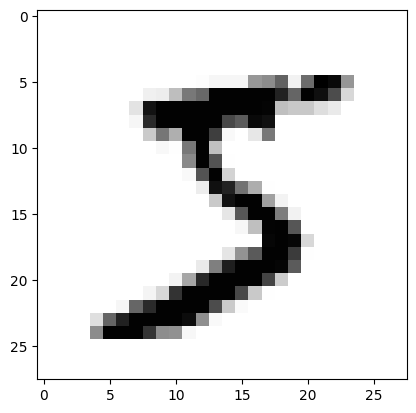

In [ ]:
#데이터 정규화(0~255 → 0.0 ~ 1.0으로 변환)
x_train, x_test = x_train / 255.0, x_test / 255.0

plt.imshow(x_train[0], cmap="Greys");

In [ ]:
#모델만들기
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #28*28의 2차원배열을 784크기의 1차원 배열로 변환
model.add(tf.keras.layers.Dense(512, activation='relu')) #512개 출력
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax')) #10개의 출력

#모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#모델 학습
model.fit(x_train, y_train, epochs=5)

#결과
score=model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8931 - loss: 0.3614
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9702 - loss: 0.0997
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9795 - loss: 0.0671
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9835 - loss: 0.0516
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9875 - loss: 0.0374
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9792 - loss: 0.0743


In [ ]:
print('손실값:', score[0])
print('정확도:', score[1])

손실값: 0.06342778354883194
정확도: 0.9825999736785889


#Keras를 이용한 fashion MNIST
- categorical_crossentropy


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


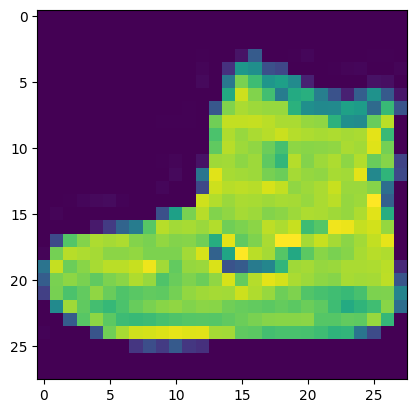

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
plt.imshow(train_images[0])
plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('정확도:', test_acc)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7834 - loss: 0.6210
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8602 - loss: 0.3858
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8757 - loss: 0.3394
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8836 - loss: 0.3143
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8908 - loss: 0.2976
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8739 - loss: 0.3501
정확도: 0.8715999722480774


#Keras를 이용한 fashion MNIST
- categorical_crossentropy
- 원핫인코딩

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


##(2) 이미지 확인

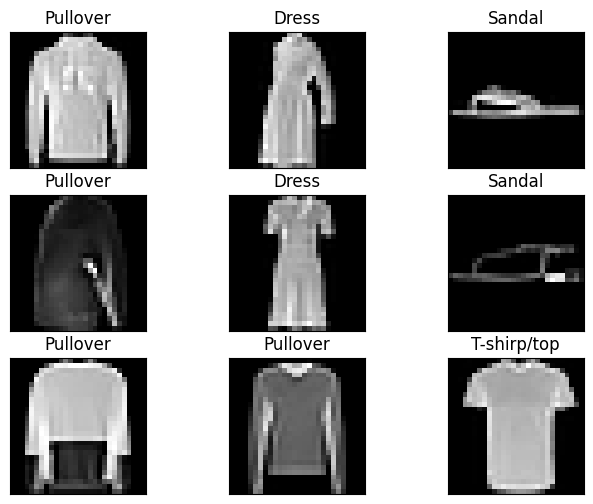

In [ ]:
class_names =['T-shirp/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

samples = np.random.randint(len(X_train), size = 9)

plt.figure(figsize = (8,6))
for i , idx in enumerate(samples):
  plt.subplot(3,3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[idx], cmap ='gray')
  plt.title(class_names[y_train[idx]])
plt.show()

##(3) 검증 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size = 0.3, random_state = 42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)


(42000, 28, 28) (42000,)
(18000, 28, 28) (18000,)


##(4) 이미지 데이터의 정규화(최대-최소 정규화)
-

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.001)

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

최대: 1.0 최소: 0.0


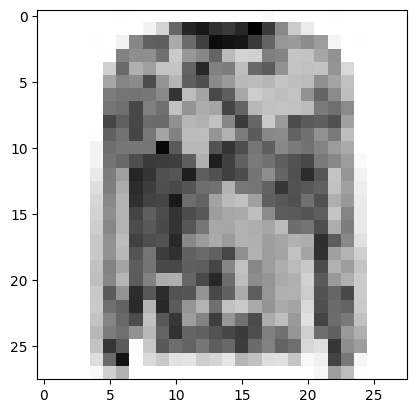

In [ ]:
import numpy as np

X_train = X_train.astype('float32')/255
X_val = X_val.astype('float32')/255
X_test = X_test.astype('float32')/255

print('최대:',np.max(X_train),   '최소:',np.min(X_train))

#시각화
plt.imshow(X_train[5], cmap="Greys");

##(5) Shape 변경
- 이미지 데이터를 Dense 레이어에 입력하기 위해 데이터를 batch num,  input num 형태로 변경

In [ ]:
X_train = (X_train.reshape((-1,28*28))) #-1을 사용하여 첫 번째 차원의 크기를 자동으로 계산
X_val = (X_val.reshape((-1,28*28)))
X_test = (X_test.reshape((-1,28*28)))

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(42000, 784) (42000,)
(18000, 784) (18000,)
(10000, 784) (10000,)


##(6) 원- 핫 인코딩

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_val_oh = to_categorical(y_val)
y_test_oh = to_categorical(y_test)

y_train_oh[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

##(7) 모델 만들기

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
  model = keras.Sequential()
  model.add(layers.Flatten(input_shape=(784,)))
  model.add(layers.Dense(64, activation ='relu',input_shape = (784,)))
  model.add(layers.Dense(32, input_shape = (784,)))
  model.add(layers.Dense(10, activation ='softmax'))
  return model

In [ ]:
model = build_model()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

##(8)컴파일
- 손실함수, 옵티마이저, 메트릭스 설정

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.001)

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['acc'])

##(9)학습

In [ ]:
EPOCHS = 100
BATCH_SIZE =64

history = model.fit(X_train, y_train_oh,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_split = .2)

Epoch 1/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - acc: 0.7131 - loss: 0.8149 - val_acc: 0.8414 - val_loss: 0.4686
Epoch 2/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.8456 - loss: 0.4392 - val_acc: 0.8537 - val_loss: 0.4342
Epoch 3/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8575 - loss: 0.3950 - val_acc: 0.8664 - val_loss: 0.3830
Epoch 4/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.8706 - loss: 0.3546 - val_acc: 0.8646 - val_loss: 0.3839
Epoch 5/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.8763 - loss: 0.3419 - val_acc: 0.8699 - val_loss: 0.3685
Epoch 6/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8781 - loss: 0.3385 - val_acc: 0.8720 - val_loss: 0.3491
Epoch 7/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8891 - loss: 0.3086 - val_acc: 0.8685 - val_loss: 0.3645
Epoch 8/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.8876 - loss: 0.3043 - val_acc: 0.8744 - val_loss: 0.3420
Epoch 9/100
525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

##(10) 학습곡선

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize = (16,8))

  plt.subplot(1,2,1)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
  plt.plot(hist['epoch'], hist['val_loss'], label='Val Loss')
  plt.legend()

  plt.subplot(1,2,2)
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_acc'], label='Val Accuracy')
  plt.legend()

plt.show()

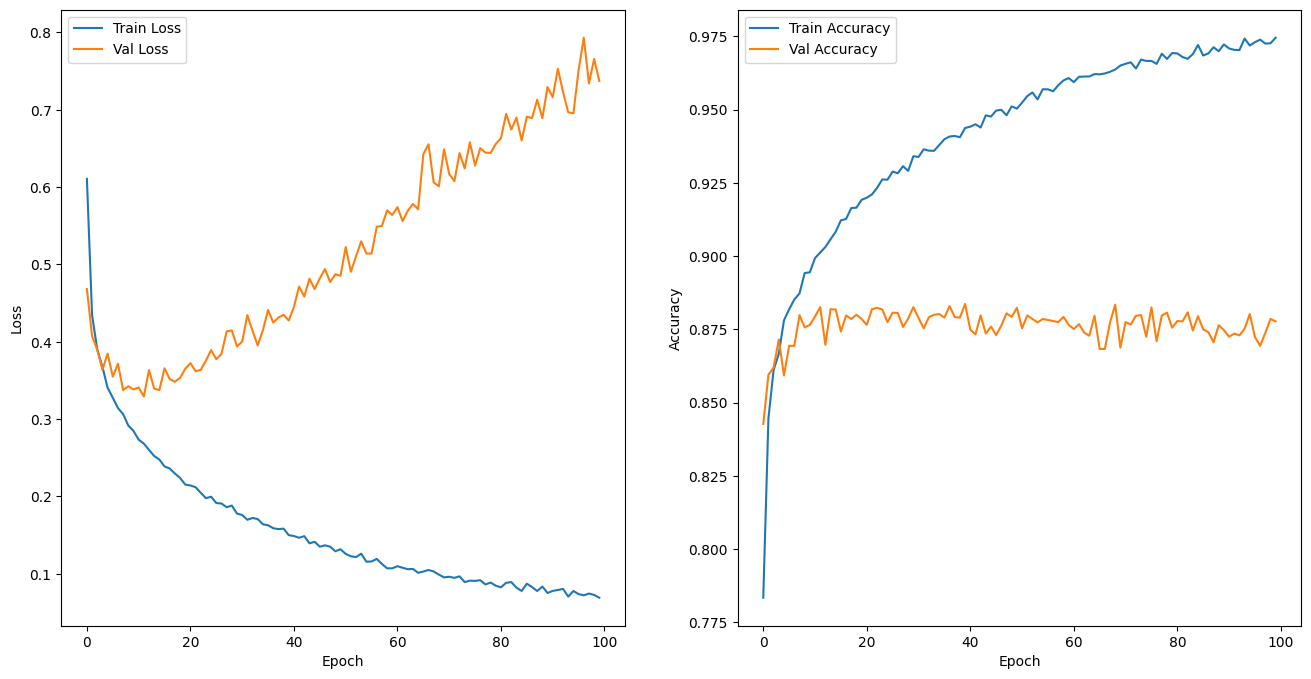

In [ ]:
plot_history(history)

##(11) 예측

In [ ]:
y_pred = model.predict(X_test)
y_pred[:1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[8.4679995e-17, 1.1141864e-21, 7.6350630e-26, 2.2493510e-31,
        1.0096815e-17, 4.4643681e-12, 5.5838181e-20, 1.6519149e-09,
        1.0099223e-28, 1.0000000e+00]], dtype=float32)

##(12) 가장 높은 확률 인덱스 추출
- np.argmax()

In [ ]:
y_pred_argmax = np.argmax(y_pred, axis = 1)
y_pred_argmax[:10]


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

##(13) 예측 결과의 이미지 표시

<Figure size 1000x400 with 0 Axes>

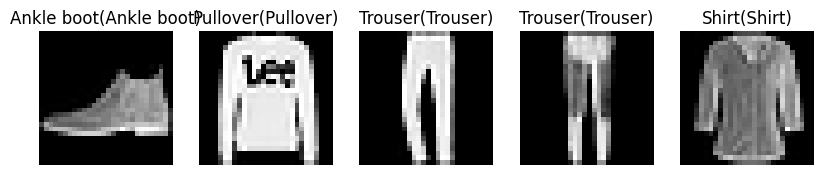

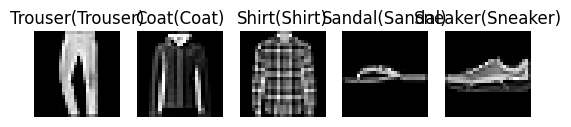

In [ ]:
class_names =['T-shirp/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

n_rows = 2
n_cols = 5

plt.figure(figsize = (n_cols *2, n_rows *2))
plt.figure(figsize = (n_cols *2, n_rows *2))
for row in range(n_rows):
  for col in range(n_cols):
    index = n_cols * row + col
    plt.subplot(n_rows, n_cols, index + 1)
    plt.imshow(X_test[index].reshape(28,28), cmap = 'gray')
    #plt.imshow(X_test[index], cmap = 'gray')
    plt.axis('off')
    plt.title(f'{class_names[y_pred_argmax[index]]}({class_names[y_test[index]]})')

  plt.show()

# [실습] 붓꽃데이터 / 펭귄데이터를 이용한 분류 실습**

# ►회사 주식 예측하기

In [ ]:
df = pd.read_csv('./fly-AI/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
# 라이블러ㅣ 호출

#데이터 가공
import numpy as np
import pandas as pd

# 카테고리컬 인코딩
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# 피쳐 스케일링
from sklearn.preprocessing import MinMaxScaler

# 데이터셋 분리
from sklearn.model_selection import train_test_split

# 인공지능 모델링
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# 학습할 데이토와 예측 데이터 설정

# 학습 데이터 X
# X = Profit 컬럼 빼고 전부
X = df.iloc[ : ,0:-1]

# 예측 데이터 y
# y = Profit, 수익
y = df['Profit']

In [ ]:
# 데이터 확인

df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [ ]:
# 정수로 변환

# 카테고리컬 인코딩
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer( [ ('encoder', OneHotEncoder(), [3] ) ], remainder='passthrough')
X = ct.fit_transform(X)

# 3개의 고유값에서 최적화를 위하여 한 개의 데이터 제거
X = X[ : , 1 : ]

In [ ]:
# 피쳐 스케일링 (y데이터 형식을 2차원 배열로 변경)

# y 데이터는 Profit의 컬럼만 가지므로 시리즈 데이터를 2차원 배열로 변경 해야 함
y.shape

(50,)

In [ ]:
y = y.values.reshape(50, 1)
y.shape

(50, 1)

##서로 다른 범위의 정수의 데이터들을 일정 범위에 맞게 피쳐 스케일링 진행 (정규화)

- m_sc_X : 학습 데이터 X를 정규화하는 스케일러
- m_sc_y : 예측 데이터 y를 정규화하는 스케일러
- X_scaled : 정규화 된 X의 값을 가지는 변수
- y_scaled : 정규화 된 y의 값을 가지는 변수

In [ ]:
# 피쳐 스케일링
from sklearn.preprocessing import MinMaxScaler
m_sc_X = MinMaxScaler()
m_sc_y  = MinMaxScaler()
X_scaled = m_sc_X.fit_transform(X)
y_scaled = m_sc_y.fit_transform(y)

In [ ]:
# 데이터셋 분리, 기본 값 테스트 사이즈 25%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, random_state = 3)

In [ ]:
# 인공지능 모델 생성

model=Sequential()
model.add( Dense(units=5, activation='relu', input_shape=( 5 , )) )
model.add( Dense(units=15, activation='relu') )
model.add( Dense(units=10, activation='relu') )
model.add( Dense(units=1, activation='linear') )

###레이어 설정

- 유닛과 활성함수는 원하는대로 설정
- 첫번째 input layer는 반드시 입력층의 형태를 지정
- 마지막 output layer는 분류 문제의 모델이 아니기 때문에 sigmiod 사용하지 않음

In [ ]:
# 컴파일 설정 (adam)

model.compile(loss='mse', optimizer='adam')

## 학습 및 측정
- epoch_history : 임의의 변수, 학습 내용을 저장 (오차(손실) 확인용도)
- epochs : 모델의 전체 데이터 셋에서 학습 횟수
- batch_size : 샘플의 갯수대로 학습 한 후 가중치 갱신

In [ ]:
# 학습 결과 변수에 저장
# 200번 학습, 10번 단위로 가중치 갱신
epoch_history = model.fit(X_train, y_train, epochs=200, batch_size=10)

Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: 0.6264
Epoch 2/200
4/4 [==============================] - 0s 6ms/step - loss: 0.5628
Epoch 3/200
4/4 [==============================] - 0s 4ms/step - loss: 0.5067
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 0.4550
Epoch 5/200
4/4 [==============================] - 0s 4ms/step - loss: 0.4057
Epoch 6/200
4/4 [==============================] - 0s 5ms/step - loss: 0.3652
Epoch 7/200
4/4 [==============================] - 0s 6ms/step - loss: 0.3283
Epoch 8/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2986
Epoch 9/200
4/4 [==============================] - 0s 4ms/step - loss: 0.2661
Epoch 10/200
4/4 [==============================] - 0s 7ms/step - loss: 0.2394
Epoch 11/200
4/4 [==============================] - 0s 5ms/step - loss: 0.2128
Epoch 12/200
4/4 [==============================] - 0s 5ms/step - loss: 0.1871
Epoch 13/200
4/4 [==============================] - 0s 5ms/st

In [ ]:
# 예측(학습 모델을 이용한 결과값 예측, perdict)
# 결과값 예측
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 148ms/step


In [ ]:
# 결과값 확인
y_pred

array([[0.62106407],
       [0.45270175],
       [0.82151484],
       [0.1761257 ],
       [0.44295564],
       [0.38219416],
       [0.65362954],
       [0.1873869 ],
       [0.3582191 ],
       [0.66951025],
       [0.36696497],
       [0.5979545 ],
       [0.5224757 ]], dtype=float32)

In [ ]:
# 실제값 확인
y_test

array([[0.71462897],
       [0.37348913],
       [0.7606613 ],
       [0.15698988],
       [0.46627976],
       [0.49893437],
       [0.67364377],
       [0.11821128],
       [0.28294041],
       [0.79649041],
       [0.42812595],
       [0.52963376],
       [0.42385155]])

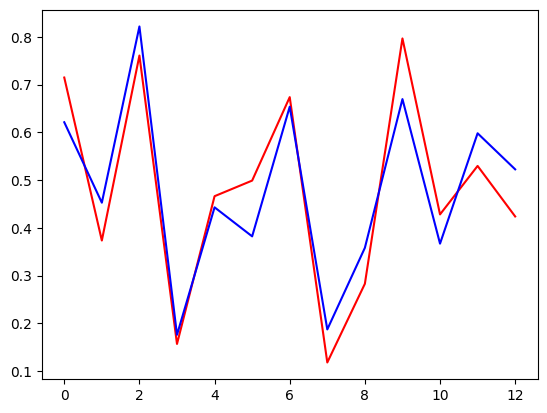

In [ ]:
# 실제값과 예측값 비교

import matplotlib.pyplot as plt
plt.plot(y_test, c='r') # 실제값은 빨간선
plt.plot(y_pred, c='b') # 예측값은 파란선
plt.show()

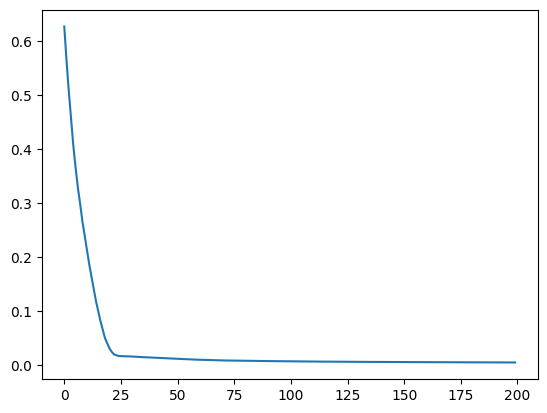

In [ ]:
## 인공신경망 모델의 오차(손실) 확인
### 최종 값이 낮을수록 모델의 성능이 향상, 즉 정확도가 높아짐

plt.plot(epoch_history.history['loss'])
plt.show()

# 금융상품 갱신 여부 예측하는 인공신경망 구성하기

In [ ]:
# 라이브러리 호출

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# 데이터 확인

df = pd.read_csv('./fly-AI/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# 학습 할 데이터와 예측 데이터 설정
### 학습 데이터 X
### 학습에 필요한 데이터만 추출

In [ ]:
# 학습할 데이터 설정 [CreditScore:EstimatedSalary]
X = df.iloc[ : , 3:-2+1 ]
X.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.0,1,1,1,101348.88


In [ ]:
# 예측 할 데이터 설정
y = df['Exited']
y.head() # 0과 1로 구분, 1:갱신/0:미갱신

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

## 문자열 데이터 숫자로 치환
###컬럼에서 Geography와 Gender가 문자열로 되어 있으므로 컴퓨터가 학습 할 수 있게 정수로 변경
- 절차 : 각 컬럼의 고유 값 갯수 확인 > 카테고리컬 인코딩 진행
- 카테고리컬 인코딩 : 고유값이 2개일 경우 Label Encoding, 2개 초과일 경우 OneHot Encoding

In [ ]:
# 문자열 데이터 고유값 확인
print('Geography : ', X['Geography'].unique())
print('Gender : ', X['Gender'].unique())

Geography :  ['France' 'Spain' 'Germany']
Gender :  ['Female' 'Male']


In [ ]:
# 카테고리컬 인코딩
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# 성별은 고유값이 2개이므로 레이블 인코딩 진행
l_encoder_gender = LabelEncoder()
X['Gender'] = l_encoder_gender.fit_transform( X['Gender'] )

# 국가는 고유값이 3개이므로 원핫 인코딩 진행
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer( [ ('encoder', OneHotEncoder(), [1] ) ], remainder='passthrough')
X = ct.fit_transform(X)

# 최적화를 위해 컬럼 하나 삭제
# 이유? 3개의 컬럼 중 원핫 인코딩의 0 0 이 되는 부분이 다른 컬럼이기 때문
# germany  spain
# 0         0
# 0         1
# 1         0
# France 컬럼 제외
X = X[ : , 1: ]

# 피쳐 스케일링
## 서로 다른 범위의 정수의 데이터들을 일정 범위에 맞게 피쳐 스케일링 진행

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc_X = MinMaxScaler()
X = sc_X.fit_transform(X)

# 6. 인공지능 학습을 위한 학습 데이터와 검증용 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

# 7. 인공신경망 모델링
- 모델링 변수 지정 (변수 : model)

In [ ]:
model =Sequential()

In [ ]:
# 첫번째 레이어 input layer 추가
# 유닛 6개, 전달 값 11개
model.add( Dense(units=6, activation='relu', input_shape=(11,)) )

# 두번째 레이어 hidden layer 추가
# 첫번째 레이어에서 입력층의 크기를 정했으므로 생략 가능
# 유닛 8개, input layer에서 전달 받는 값 11개
model.add( Dense(units=8, activation=tf.nn.relu ) )

# 세번째 레이어 output layer 추가
model.add( Dense(units=1, activation='sigmoid') )

## 컴파일
### loss='binary_crossentropy'
- 출력 값이 두개인 이진 분류에서 사용
- 모델의 마지막 레이어의 활성화 함수는 시그모이드 함수 사용
### metrics=['accuracy']
- 모델의 정확도 출력
- 분류 문제의 인공지능 모델에서 사용

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()
# 파라미터 = 가중치(weight)
# 11 * 6 = 66 ->  72?
# -> 상수 하나가 포함되기 때문에 12 * 6 -> 72

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 6)                 72        
                                                                 
 dense_15 (Dense)            (None, 8)                 56        
                                                                 
 dense_16 (Dense)            (None, 1)                 9         
                                                                 
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


## 학습 및 측정
- epochs : 전체 데이터셋을 몇 번 반복 학습할지 설정
-- 만약 100이면, 서로 다른 값 100개의 가중치로 반복 학습을 진행하여 모델의 성능을 향상시킴
- batch_size : N개의 샘플로 테스트하여 가중치를 갱신할지를 설정
-- 배치 사이즈가 클수록 많은 데이터를 저장해두어야 하므로 용량이 커짐
-- 배치 사이즈가 작을수록 학습률은 높지만 가중치 갱신률이 높아져서 시간이 오래 걸림
-- 예 ) epochs=100, batch_size=100 : 모두 예측한 뒤 실제 값과 비교 후 가중치 갱신
-- 예 ) epochs=100, batch_size=50 : 반절을 예측한 뒤 실제 값과 비교 후 가중치 갱신, 나머지 다시 예측

In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=10)

Epoch 1/20
800/800 [==============================] - 4s 2ms/step - loss: 0.5263 - accuracy: 0.7666
Epoch 2/20
800/800 [==============================] - 1s 2ms/step - loss: 0.4652 - accuracy: 0.7985
Epoch 3/20
800/800 [==============================] - 1s 2ms/step - loss: 0.4498 - accuracy: 0.8016
Epoch 4/20
800/800 [==============================] - 1s 2ms/step - loss: 0.4388 - accuracy: 0.8091
Epoch 5/20
800/800 [==============================] - 1s 2ms/step - loss: 0.4329 - accuracy: 0.8119
Epoch 6/20
800/800 [==============================] - 2s 2ms/step - loss: 0.4289 - accuracy: 0.8166
Epoch 7/20
800/800 [==============================] - 2s 2ms/step - loss: 0.4260 - accuracy: 0.8186
Epoch 8/20
800/800 [==============================] - 3s 3ms/step - loss: 0.4242 - accuracy: 0.8209
Epoch 9/20
800/800 [==============================] - 2s 3ms/step - loss: 0.4208 - accuracy: 0.8254
Epoch 10/20
800/800 [==============================] - 1s 2ms/step - loss: 0.4191 - accuracy: 0.8260

## 모델 평가
- 텐서플로우는 자체적으로 검증해주는 함수 존재 (evaluate)
--정확도를 나타내는 함수는 분류 문제의 인공지능 모델에서 사용

In [ ]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 1s 2ms/step - loss: 0.4040 - accuracy: 0.8395


[0.4040450155735016, 0.8395000100135803]

In [ ]:
# 예측

y_pred = model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [ ]:
# 실제값과 예측값 확인

# 실제값은 0과 1로 구성
y_test

# 예측 값은 0과 1사이의 실수로 구성
y_pred

array([[0.27425614],
       [0.35522446],
       [0.15112267],
       ...,
       [0.1349959 ],
       [0.17464113],
       [0.1753218 ]], dtype=float32)

In [ ]:
# y_pred는 0과 1로 구분하기 위해 데이터 가공
# 0.5 초과 > True
# 0.5 이하 > False
y_pred = (y_pred>0.5).astype(int)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

## 결과 지표 (컨퓨전 매트릭스)
- 결과 지표는 인공지능 모델이 맞춘 것과 못 맞춘 것을 나타내므로 분류 문제에서 사용

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(y_test, y_pred)

array([[1536,   59],
       [ 262,  143]])

In [ ]:
# 수동으로 정확도 계산하기
cm = confusion_matrix(y_test, y_pred)
(1546+152) / cm.sum()

0.849

In [ ]:
#라이브러리

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dense, Input

In [ ]:
#1. 데이터 설정

weights = np.array([87,81,82,92,90,61,86,66,69,69,76,53,70])
heights = np.array([187,174,179,192,188,160,179,168,168,174,182,162,176])

In [ ]:
#2. 데이터 스케일링
scaler = StandardScaler()
weights_scaled = scaler.fit_transform(weights.reshape(-1,1))
heights_scaled = scaler.fit_transform(heights.reshape(-1,1))

In [ ]:
#3. 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(weights_scaled,
                                                    heights_scaled,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
#4.모델1- 단일 레이어 아키텍쳐

model = Sequential()
dense_layer = Dense(units=1, input_shape=[1])
model.add(dense_layer)
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

## 위에서 param# 2(가중치하나와 바이어스 하나로 총 두개)

In [ ]:
#5. 모델 학습 (model.fit)

model.fit(X_train, y_train, epochs=100, verbose=0)

## 위에서 verbose=0은 fit 메서드에서 사용되고 모델 학습 중 출력되는 로그의 상세 정도를 설정하는 옵션

verbose=0:
- 아무런 로그를 출력하지 않는다
- 학습 상태를 확인하지 않아도 될 때 유용

verbose=1 (기본값):
- 학습 진행 상황을 한 줄씩 출력
- epoch별로 손실 값을 표시하며, 진행 바(progress bar)가 표시

In [ ]:
#6. 단일모델을 학습하고 모델2-Hidden layer를 추가

model2 = Sequential([
    Input(shape=(1,)),
    Dense(units=64, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=1)
])

model2.compile(optimizer= 'adam',loss= 'mean_squared_error')
model2.summary()
model2.fit(X_train, y_train, epochs=150, verbose=0)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 64)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,353 (17.00 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#7. 예측 및 평가

predictions = model.predict(X_test)
predictions2 = model2.predict(X_test)

mse_model1 = mean_squared_error(y_test, predictions)
mse_model2 = mean_squared_error(y_test, predictions2)

print(f"Model 1 MSE: {mse_model1}")
print(f"Model 2 MSE: {mse_model2}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
Model 1 MSE: 7.391840635702842
Model 2 MSE: 0.41760165404727273


In [ ]:
# 값 예측 테스트

def predict_height(weight):
    # 입력 데이터를 2D 배열로 변환
    weight_array = np.array([[weight]])
    # 스케일링 적용
    weight_scaled = scaler.transform(weight_array)
    # 예측
    height_scaled = model2.predict(weight_scaled)
    # 스케일 복원
    height_original = scaler.inverse_transform(height_scaled)
    # 결과 출력
    return f"predict({weight}) = {height_original[0, 0]:.2f}"
# 결과
result = predict_height(90)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
predict(90) = 69.06


### 위의 예측을 해보면 몸무게가 90일경우 키가 69.75? 이상한 값이 !!!!!

#지금처럼 이상한 값이 나왔을 경우 예상해 볼 수 있는 문제로는

1. StandardScaler의 스케일링 문제
2. 모델의 학습 및 예측 문제
3. 모델 성능 문제
4. 스케일링 후 복원 문제

## 키와 몸무게는 같은 단위를 사용하지 않기 때문에 각자 다른 스케일러를 사용

In [ ]:
# 위 코드에서 데이터 스케일링 수정

weight_scaler = StandardScaler()
height_scaler = StandardScaler()
weights_scaled = weight_scaler.fit_transform(weights.reshape(-1,1))
heights_scaled = height_scaler.fit_transform(heights.reshape(-1,1))

In [ ]:
#값 예측 테스트
def predict_height(weight):
    # 입력 데이터를 2D 배열로 변환
    weight_array = np.array([[weight]])
    # 스케일링 적용
    weight_scaled = weight_scaler.transform(weight_array)
    # 예측
    height_scaled = model2.predict(weight_scaled)
    # 스케일 복원
    height_original = height_scaler.inverse_transform(height_scaled)
    # 결과 출력
    return f"predict({weight}) = {height_original[0, 0]:.2f}"
# 예측
result = predict_height(90)
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
predict(90) = 186.88


# 간단한 신경망 모델 만들기

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [ ]:
x = [-3, 31, -11, 4, 0, 22, -2, -5, -25, -14]
y = [-2, 32, -10, 5, 1, 23, -1, -4, -24, -13]

X_train = np.array(x).reshape(-1, 1)
y_train = np.array(y)

print(X_train.shape, y_train.shape)

(10, 1) (10,)


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=1, activation='linear', input_dim=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=1, activation='linear', input_dim=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#----------------------------------------------
# 의사결정트리
- sklearn을 이용한 의사결정트리
-  (0, 0)-> 0이고 (1, 1)->1

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X = [[0, 0], [1, 1]]
Y = [0, 1]

clf = DecisionTreeClassifier()

clf = clf.fit(X, Y)

In [ ]:
clf.predict([[2., 2.]])


array([1])

#의사결정트리를 이용한 Iris 분류

In [ ]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter


In [ ]:
iris = load_iris()
x_index = 0
y_index = 1

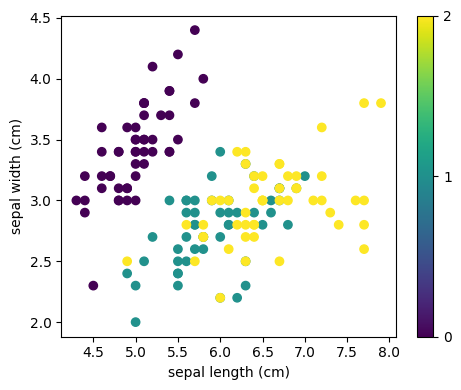

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)

formatter = FormatStrFormatter('%d')
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

plt.tight_layout()
plt.show()


[Text(0.4, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.666\nsamples = 120\nvalue = [41, 38, 41]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 41\nvalue = [41, 0, 0]'),
 Text(0.35, 0.8333333333333333, 'True  '),
 Text(0.5, 0.75, 'x[3] <= 1.65\ngini = 0.499\nsamples = 79\nvalue = [0, 38, 41]'),
 Text(0.45, 0.8333333333333333, '  False'),
 Text(0.2, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.176\nsamples = 41\nvalue = [0, 37, 4]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.3, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.25, 'x[1] <= 2.85\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.5, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.8, 0.5833333333333334, 'x[2] <= 4.85\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]'),
 

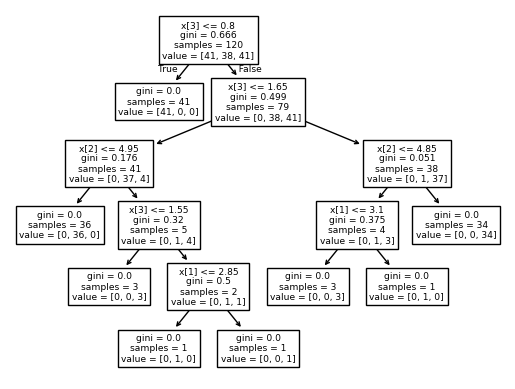

In [ ]:
from sklearn.tree import plot_tree

plot_tree(clf)

## 위에서

In [ ]:
!pip install graphviz

In [ ]:
#위에 그려진 트리를 iris.pdf 파일로 저장

import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render('iris')

'iris.pdf'

#의사결정트리를 이용한 Iris 분류

In [ ]:
import numpy as np
from sklearn import datasets, metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

iris = datasets.load_iris()

X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    random_state = 50,
                                                    test_size = 0.20)

clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_train)
print("학습 데이터 정확도:", accuracy_score(y_true = y_train, y_pred = y_pred))
y_pred = clf.predict(X_test)
print("테스트 데이터 정확도:", accuracy_score(y_true = y_test, y_pred=y_pred))

학습 데이터 정확도: 1.0
테스트 데이터 정확도: 0.9666666666666667


#SVM
- scikit-learn라이브러리 ➜ SVC
- 회귀(SVR), 분류 모두 사용

In [ ]:
from sklearn.svm import SVC

classifier =SVC(kernel='linear')

X_train = [[1,2],[1,5],[2,2],[7,5],[9,4],[8,2]]
labels = [1,1,1,0,0,0]

classifier.fit(X_train, labels) # 빨강:1, 파랑:0


SVC(kernel='linear')

In [ ]:
print(classifier.predict([[2,2]]))

[1]


In [ ]:
classifier.support_vectors_
#파랑 2개, 빨강 1개

array([[7., 5.],
       [8., 2.],
       [2., 2.]])

In [ ]:
import numpy as np
from sklearn import datasets, metrics
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.utils import shuffle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

data = datasets.fetch_california_housing()

X, y = shuffle(data.data, data.target, random_state = 7)

num_training = int(0.8 * len(X))
X_train, y_train = X[:num_training], y[:num_training]
X_test, y_test = X[num_training:], y[num_training:]


In [ ]:
# Create Support Vector Regression model
# kernel : 선형 커널
# C : 학습 오류에 대한 패널티, C 값이 클 수록 모델이 학습 데이터에 좀 더 최적화 됨, 너무 크면 오버피팅 발생
# Epsilon : 임계값, 예측한 값이 GT 범위 안에 있으면 패널티 부여 X

sv_regressor = SVR(kernel='linear',
                   C=1.0,  #0.01
                   epsilon=0.1)

sv_regressor.fit(X_train, y_train)

y_pred = sv_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

test_data = [3.7, 0, 18.4, 1, 0.87, 5.95, 91, 2.5052, 26, 666, 20.2, 351.34, 15.27]
print(sv_regressor.predict([test_data])[0])

##C값이 클수록 하드마진(오류 허용 안함), 작을수록 소프트마진(오류를 허용함)

In [ ]:
sv_regressor = SVR(kernel='linear',
                   C=0.01
                   epsilon=0.1)

sv_regressor.fit(X_train, y_train)

y_pred = sv_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)

test_data = [3.7, 0, 18.4, 1, 0.87, 5.95, 91, 2.5052, 26, 666, 20.2, 351.34, 15.27]
print(sv_regressor.predict([test_data])[0])

In [ ]:
#분리선 그리기

from sklearn.svm import SVC

classifier = SVC(kernel='linear')

#classifier.fit(X_train, y_train)